In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
# input excel file path for the new dataset
inputExcelFile = "C://Users//Rakesh//Downloads//Uber_data.xlsx"
# Reading an excel file
excelFile = pd.read_excel(inputExcelFile)
# Converting excel file into CSV file
excelFile.to_csv("New_Uber_Dataset.csv", index=None, header=True)
# Reading and Converting the output csv file into a dataframe object
data = pd.DataFrame(pd.read_csv("New_Uber_Dataset.csv"))



In [5]:
# Displaying the dataframe object
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [6]:
print(data.shape)


(1155, 7)


In [7]:
# change the column names
data.columns = ['start_date', 'end_date', 'category', 'start', 'stop', 'miles', 'purpose']


In [8]:
# Convert timestamp datatype to object

# data["start_date"]=pd.to_datetime(data["start_date"])
# data["start_date"] = pd.to_datetime(data["start_date"], format="%Y-%m-%d %H:%M:%S")

data["start_date"] = pd.to_datetime(data["start_date"], errors='coerce')

In [9]:
# fetch from the timestamp to plot time slots
data["start_hour"] = data["start_date"].dt.hour
data["end_date"] = pd.to_datetime(data["end_date"])
data["end_hour"] = data["end_date"].dt.hour

In [10]:
# Delete start_date and end_date columns
data.drop(['start_date', 'end_date'], axis='columns', inplace=True)
print(data)

      category             start              stop  miles          purpose  \
0     Business       Fort Pierce       Fort Pierce    5.1   Meal/Entertain   
1     Business       Fort Pierce       Fort Pierce    5.0              NaN   
2     Business       Fort Pierce       Fort Pierce    4.8  Errand/Supplies   
3     Business       Fort Pierce       Fort Pierce    4.7          Meeting   
4     Business       Fort Pierce   West Palm Beach   63.7   Customer Visit   
...        ...               ...               ...    ...              ...   
1150  Business           Kar?chi           Kar?chi    0.7          Meeting   
1151  Business           Kar?chi  Unknown Location    3.9   Temporary Site   
1152  Business  Unknown Location  Unknown Location   16.2          Meeting   
1153  Business        Katunayake           Gampaha    6.4   Temporary Site   
1154  Business           Gampaha         Ilukwatta   48.2   Temporary Site   

      start_hour  end_hour  
0             21        21  
1    

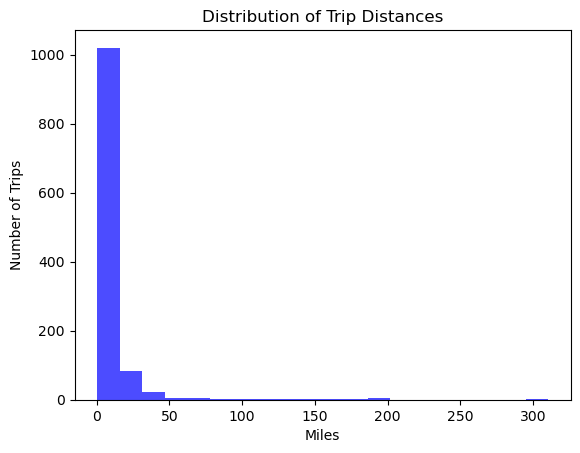

In [11]:
# Filter analysis based on new column names
# For example, let's plot a histogram of miles
plt.hist(data['miles'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Miles')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Distances')
plt.show()

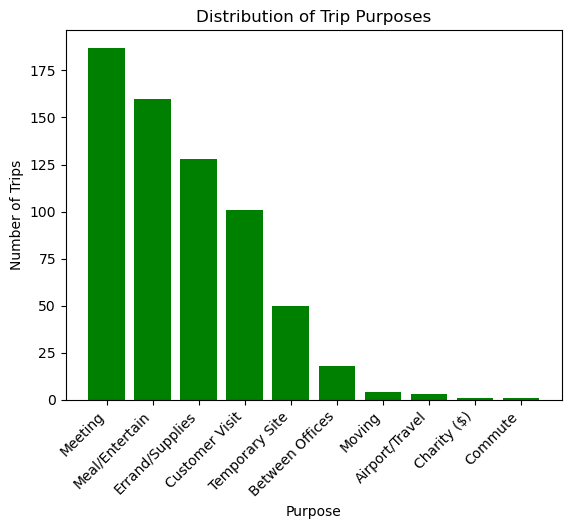

In [12]:
# Additional analysis using the 'purpose' column
purpose_counts = data['purpose'].value_counts()
plt.bar(purpose_counts.index, purpose_counts.values, color='green')
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Purposes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
# Clustering analysis using KMeans on hours and miles
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['start_hour', 'miles']])
kmeans = KMeans(n_clusters=3, init='k-means++')
data['cluster'] = kmeans.fit_predict(scaled_data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


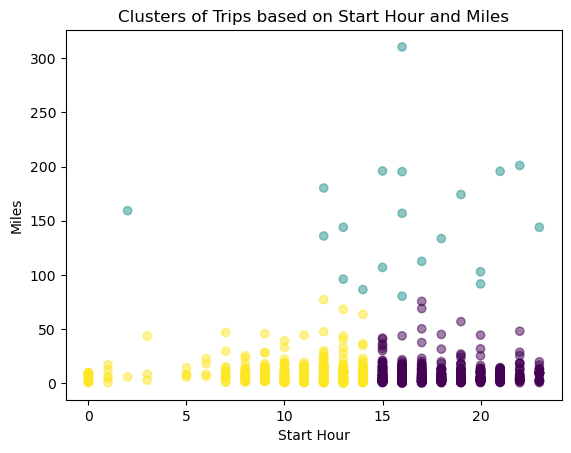

In [14]:
# Visualize the clusters using a scatter plot
plt.scatter(data['start_hour'], data['miles'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Start Hour')
plt.ylabel('Miles')
plt.title('Clusters of Trips based on Start Hour and Miles')
plt.show()
